In [7]:
from fenics import *
import matplotlib.pyplot as plt
import numpy as np

Considere la siguiente ecuacion de conveccion-difusion:
$$ \begin{cases} \frac{\partial u}{\partial t} + v \cdot \nabla u = D \nabla^2 u, &\text{ con }x\in\Omega \\ 
u(t,x,y) = 0,&\text{ con }x\in\partial\Omega\\
u(0, x, y) = \sin{(\pi x)} \cdot \sin{(\pi y)} \end{cases}$$

En donde $D \in \mathbb{R}$ y $v \in \mathbb{R}^2$, ademas:
- $v \cdot \nabla u $: es el termino de transporte
- $D \nabla^2 u$: es el termino de difusion

Sea $D = 0.1$ y $v = (1, 1)^T$. La formula variacional esta dada por:
$$ \frac{u^k - u^{k-1}}{dt} = D \nabla^2 u^k - v \cdot \nabla u^k $$
$$ u^k - u^{k-1} = dt (D \nabla^2 u^k - v \cdot \nabla u^k)$$
$$ \int_{\Omega} (u^k - u^{k-1})w \, dx = dt \int_{\Omega} (D \nabla^2 u^k - v \cdot \nabla u^k)w \, dx $$
$$ \int_{\Omega} w u^k - w u^{k-1} \, dx = dt \int_{\Omega} D \nabla^2 u^k w - (v \cdot \nabla u^k)w \, dx$$
Aplicando teorema de Green en la primera parte de la derecha obtenemos que:
$$ \int_{\Omega} D \nabla^2 u^k w \, dx = - D \int_{\Omega} \nabla u^k \cdot \nabla w \, dx + \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} w \, dS$$
Pero el ultimo termino es 0 pues $w$ se anula en la frontera, entonces:
$$ \int_{\Omega} D \nabla^2 u^k w \, dx = -dt \int_{\Omega} D \nabla u^k \cdot \nabla w + (v \cdot \nabla u^k)w \, dx $$
$$ \int_{\Omega} (u^k + dt(v \cdot \nabla u^k))w + dt D \nabla u^k \cdot \nabla w \, dx = \int_{\Omega} w u^{k-1} \, dx $$

In [2]:
fid = File("Convec_Diff/solution.pvd")

#Discretization
T = 1.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 20
#mesh = IntervalMesh(200, 0, np.pi)
mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_D = Constant(0.0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Text(0.5, 1.0, '$u(t=0, x, y) = \\sin{(\\pi x)} \\cdot \\sin{(\\pi y)}$')

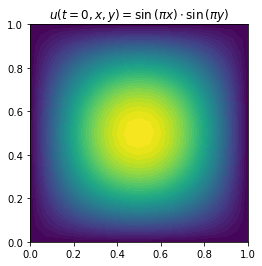

In [6]:
# The initial condition, u(t=0, x, y) = sin(pi * x) * sin(pi * y)
initial_condition = Expression("sin(3.141 * x[0]) * sin(3.141 * x[1])",degree=1)
u_old = interpolate(initial_condition,V)
plt.figure()
plot(u_old, label="t=0.0")
plt.title('$u(t=0, x, y) = \sin{(\pi x)} \cdot \sin{(\pi y)}$')

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
time = 0.02: error = 0.0814
Solving linear variational problem.
time = 0.04: error = 0.0776
Solving linear variational problem.
time = 0.06: error = 0.0734
Solving linear variational problem.
time = 0.08: error = 0.0693
Solving linear variational problem.
time = 0.10: error = 0.0657
Solving linear variational problem.
time = 0.12: error = 0.0616
Solving linear variational problem.
time = 0.14: error = 0.0584
Solving linear variational problem.
time = 0.16: error = 0.0549
Solving linear variational problem.
time = 0.18: error = 0.0519
Solving linear variational problem.
time = 0.20: error = 0.0491
Solving linear variational pro

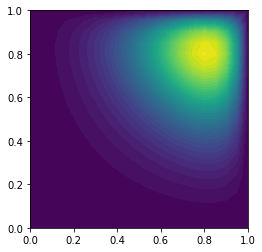

In [8]:
# Define the variational problem
D = Constant(0.1)
v = Expression(('1.0','1.0'), degree = 1)
u = TrialFunction(V)
w = TestFunction(V)

a = ((u + dt * inner(v, nabla_grad(u))) * w + dt * D * inner(nabla_grad(u), nabla_grad(w))) * dx
L = w * u_old * dx

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_old.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t
